<a href="https://colab.research.google.com/github/BrayanQuirino/MyFirstJupyter/blob/master/htmSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como crear un sevidor

Necesitamos un lugar donde se alojara nuestro servidor. Crear una maquina en Azure  con las siguientes características.

* Public IP address: enable
* Operating system: Linux (ubuntu 18.04)
* Size: Standard D2s v3 (2 vcpus, 8 GiB memory)

Para ver como crear una maquina virtual con mas detalle da clic [aquí.](https://www.youtube.com/watch?v=uAUvetIRY50)

## Acceso a nuestra nueva maquina
Tenemos varias formas de accesar a nuestra máquina, la primera por la consola estándar de Windows cmd, la segunda por putty  y la tercera, la propia consola de Azure.

## Windows cmd



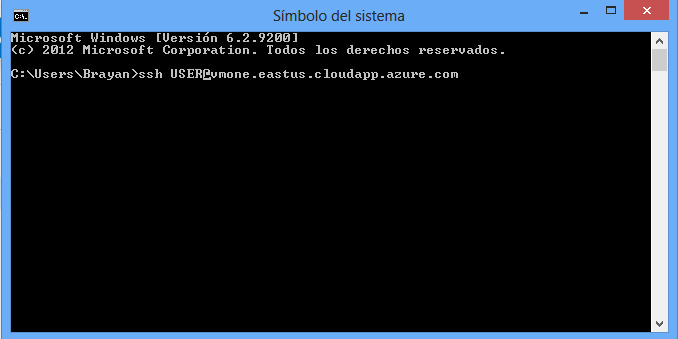

In [14]:
Image('consolaazure.png',width=800)